

Reading
Folder 1


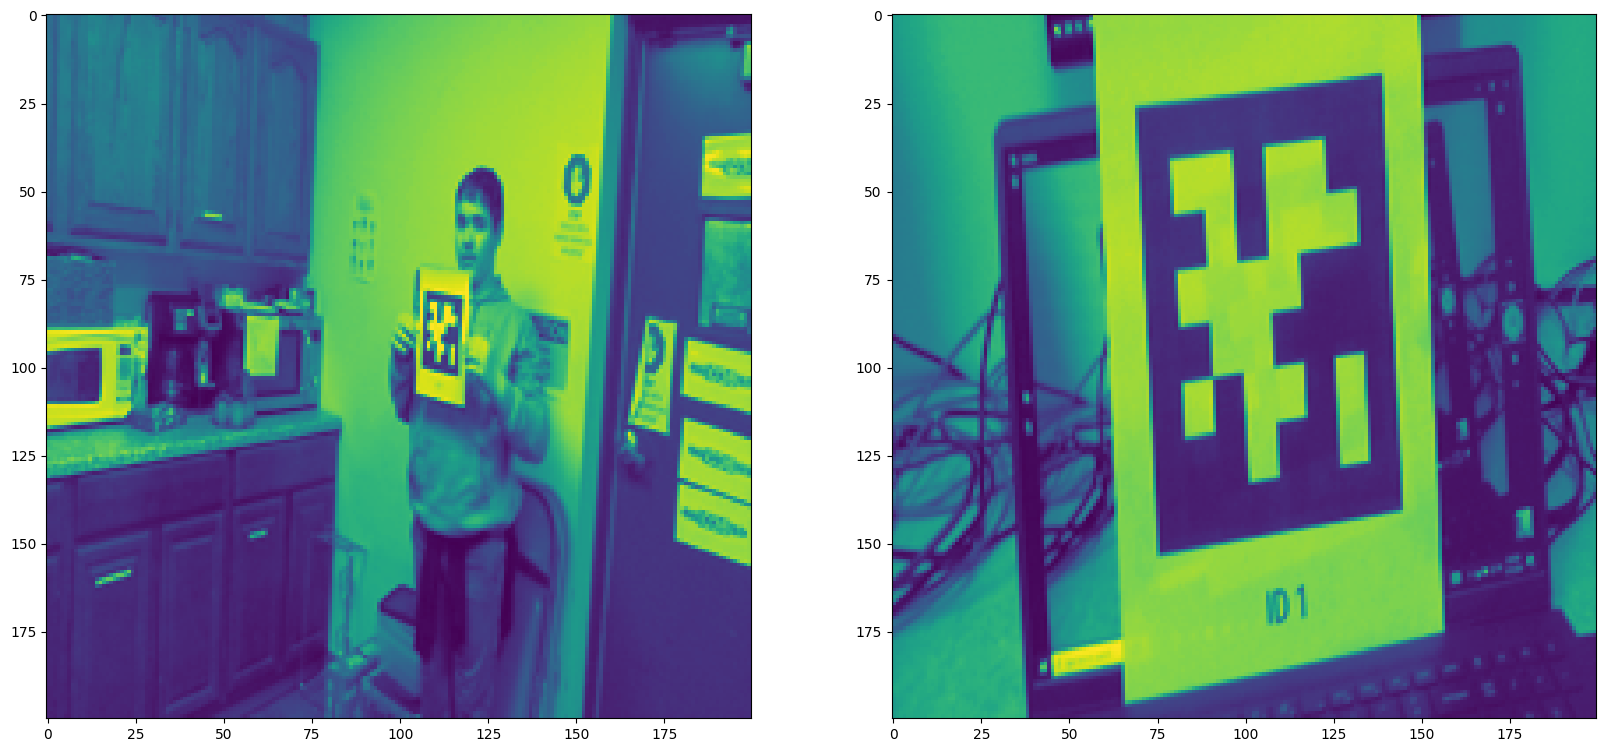

[0, 0.559643, 0.457282, 0.078038, 0.2]
[0, 0.523969, 0.458252, 0.474916, 0.897087]
Folder 10


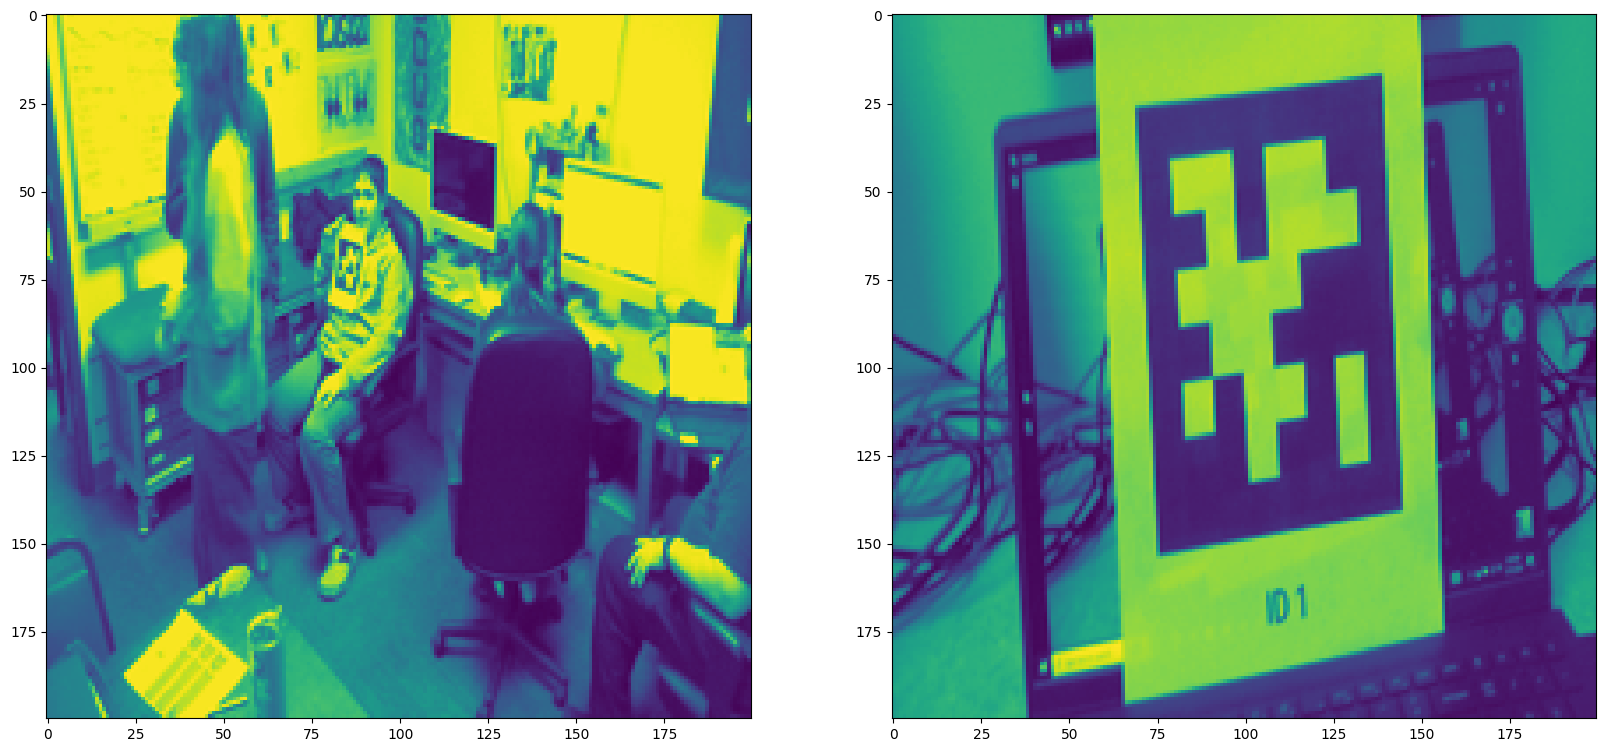

[9, 0.426979, 0.364078, 0.053512, 0.099029]
[0, 0.523969, 0.458252, 0.474916, 0.897087]
Folder 11


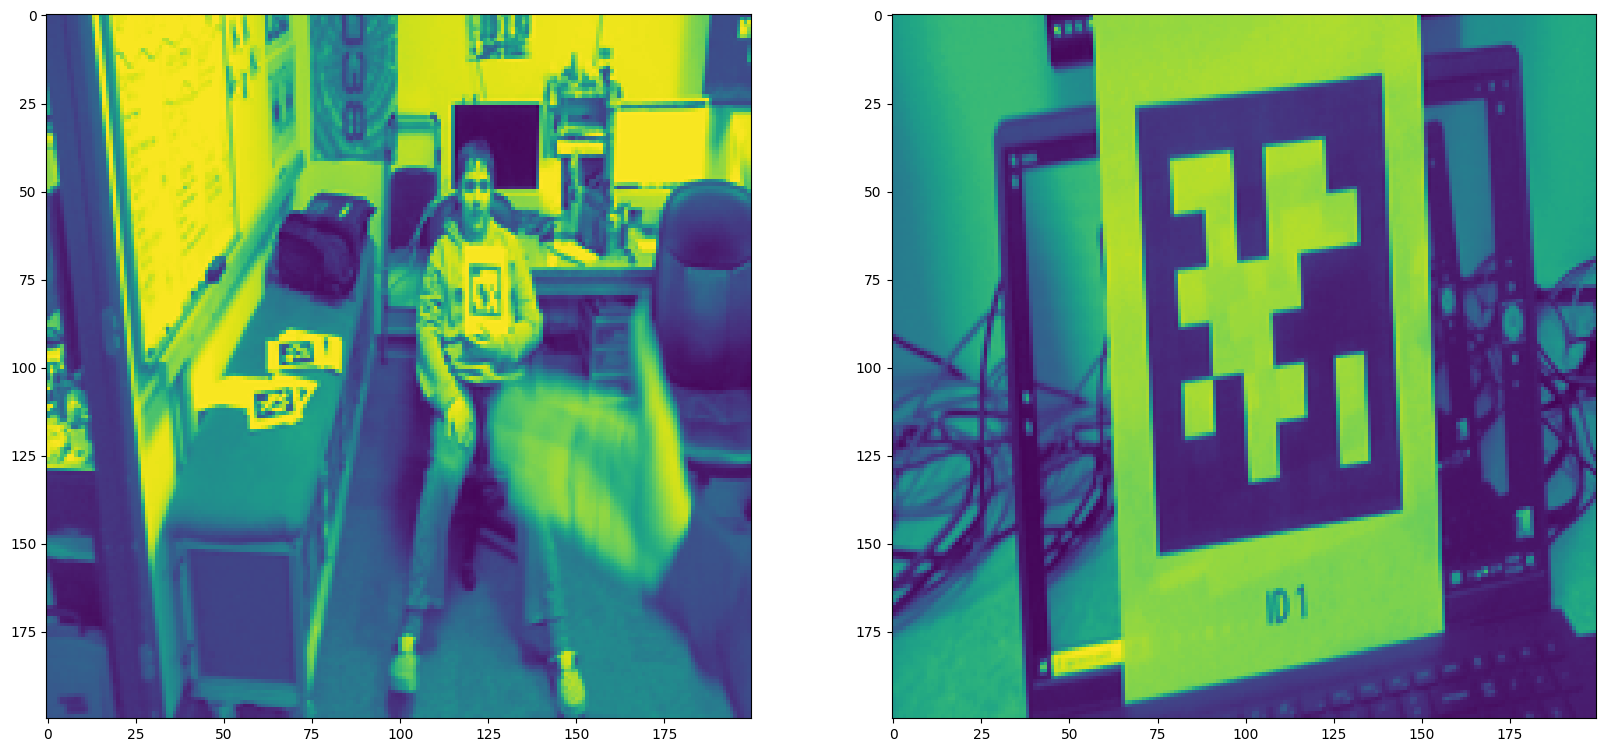

[10, 0.622074, 0.400971, 0.069119, 0.12233]
[0, 0.523969, 0.458252, 0.474916, 0.897087]
Folder 12


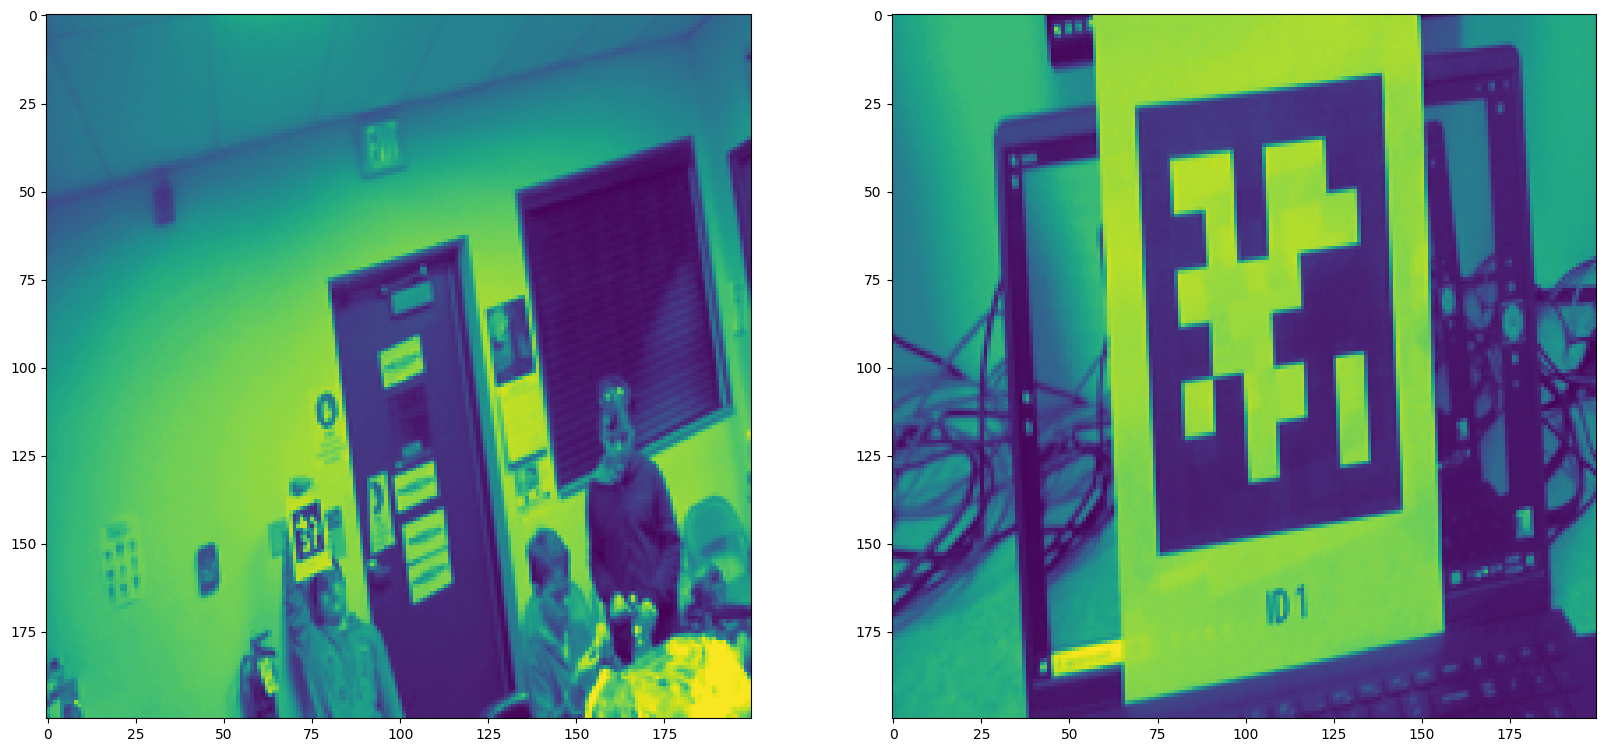

[11, 0.374582, 0.748544, 0.082497, 0.118447]
[0, 0.523969, 0.458252, 0.474916, 0.897087]
Folder 13


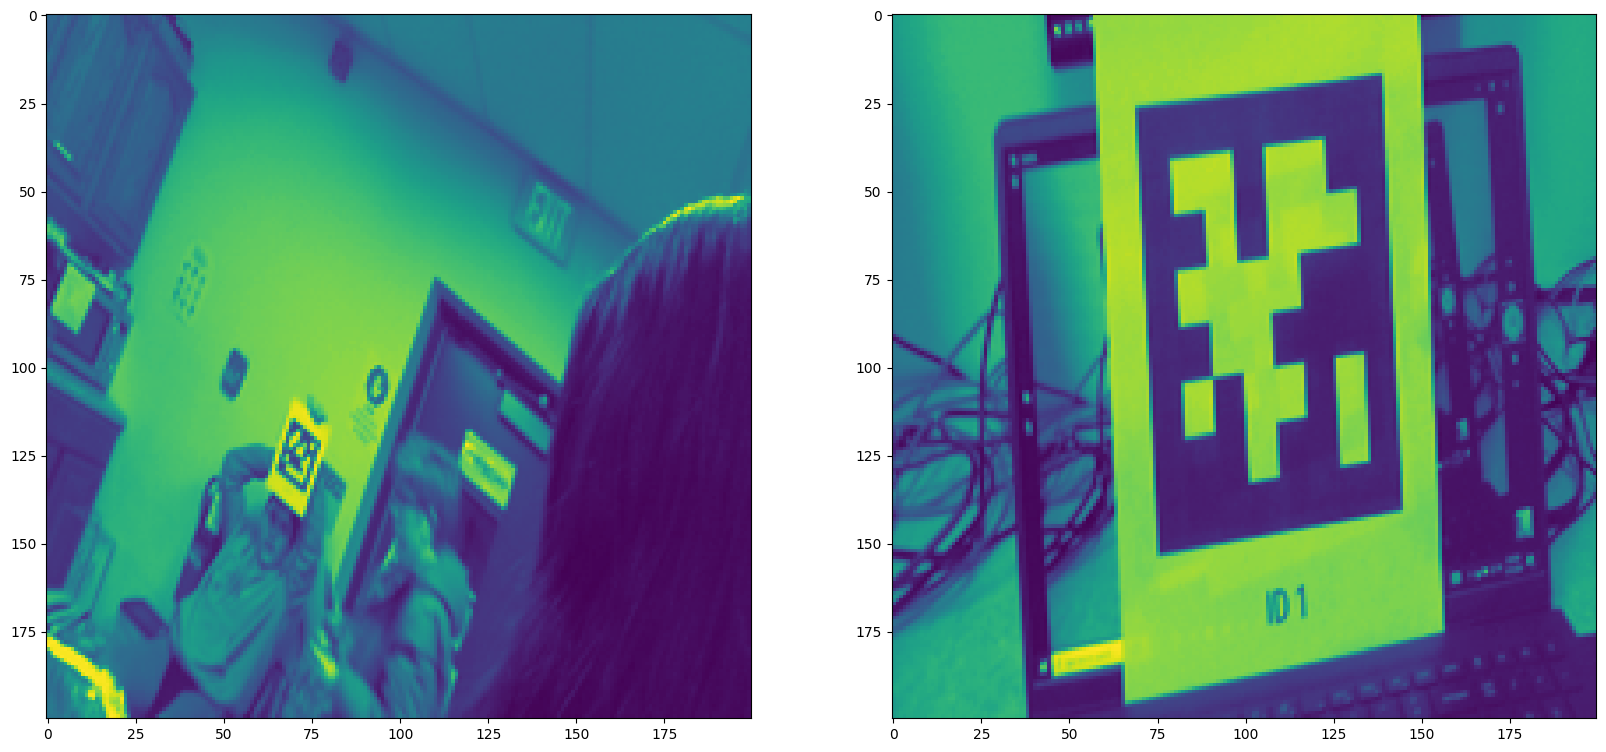

[12, 0.35786, 0.631068, 0.057971, 0.163107]
[0, 0.523969, 0.458252, 0.474916, 0.897087]
Folder 14


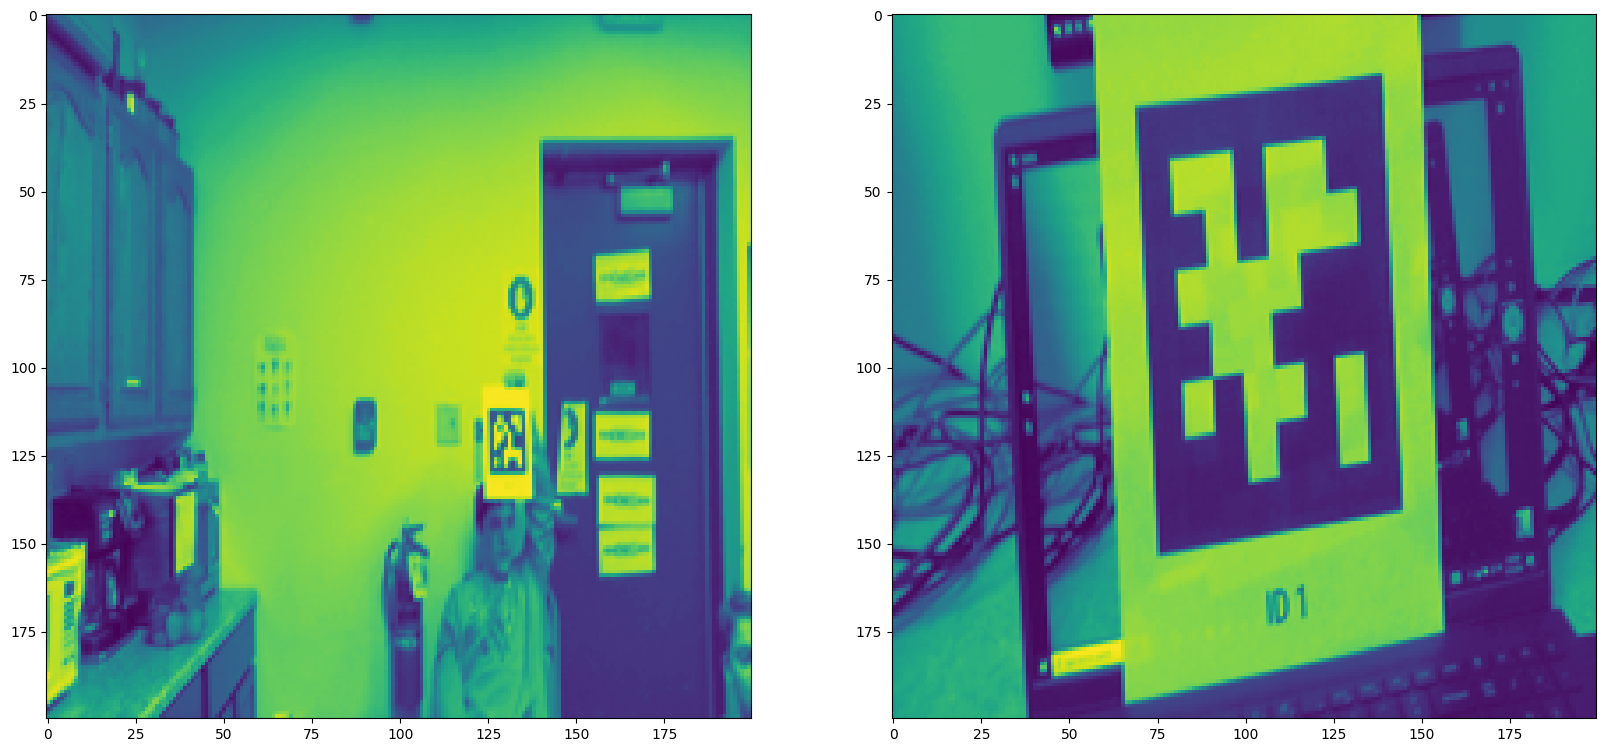

[13, 0.654961, 0.612621, 0.070234, 0.153398]
[0, 0.523969, 0.458252, 0.474916, 0.897087]
Folder 15


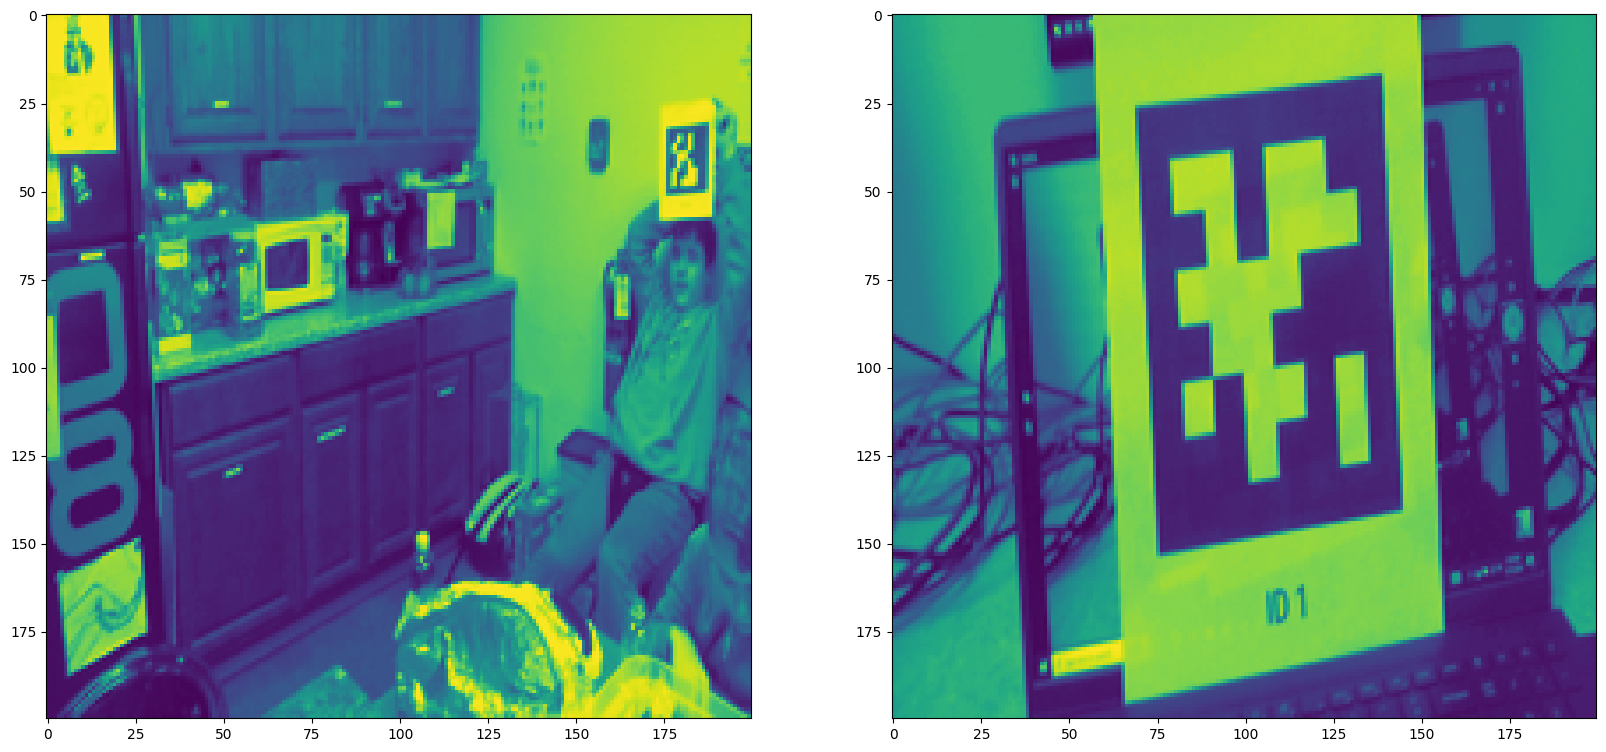

[14, 0.905797, 0.22233, 0.068004, 0.161165]
[0, 0.523969, 0.458252, 0.474916, 0.897087]
Folder 16


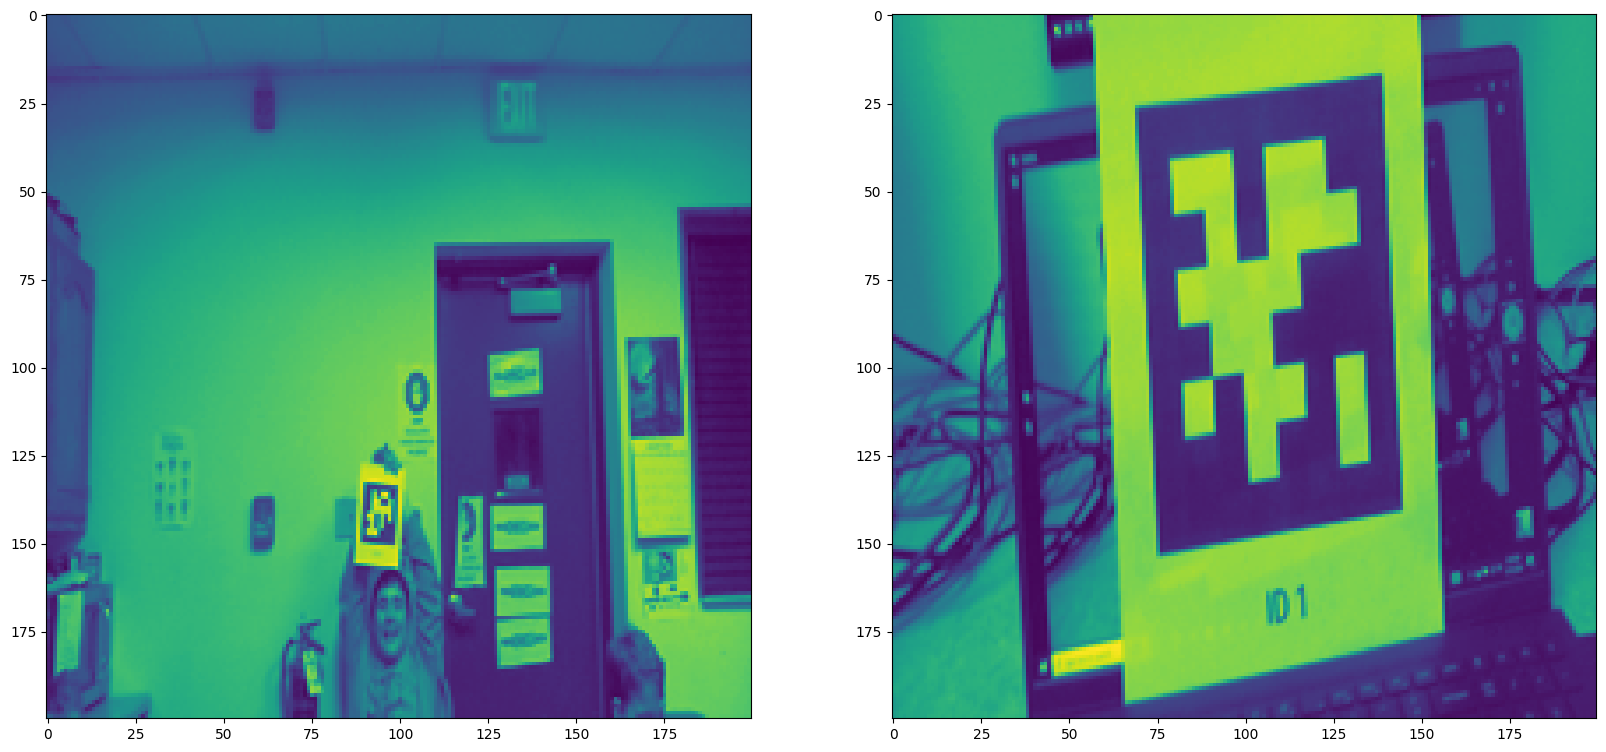

[15, 0.471572, 0.707767, 0.053512, 0.153398]
[0, 0.523969, 0.458252, 0.474916, 0.897087]
Folder 2


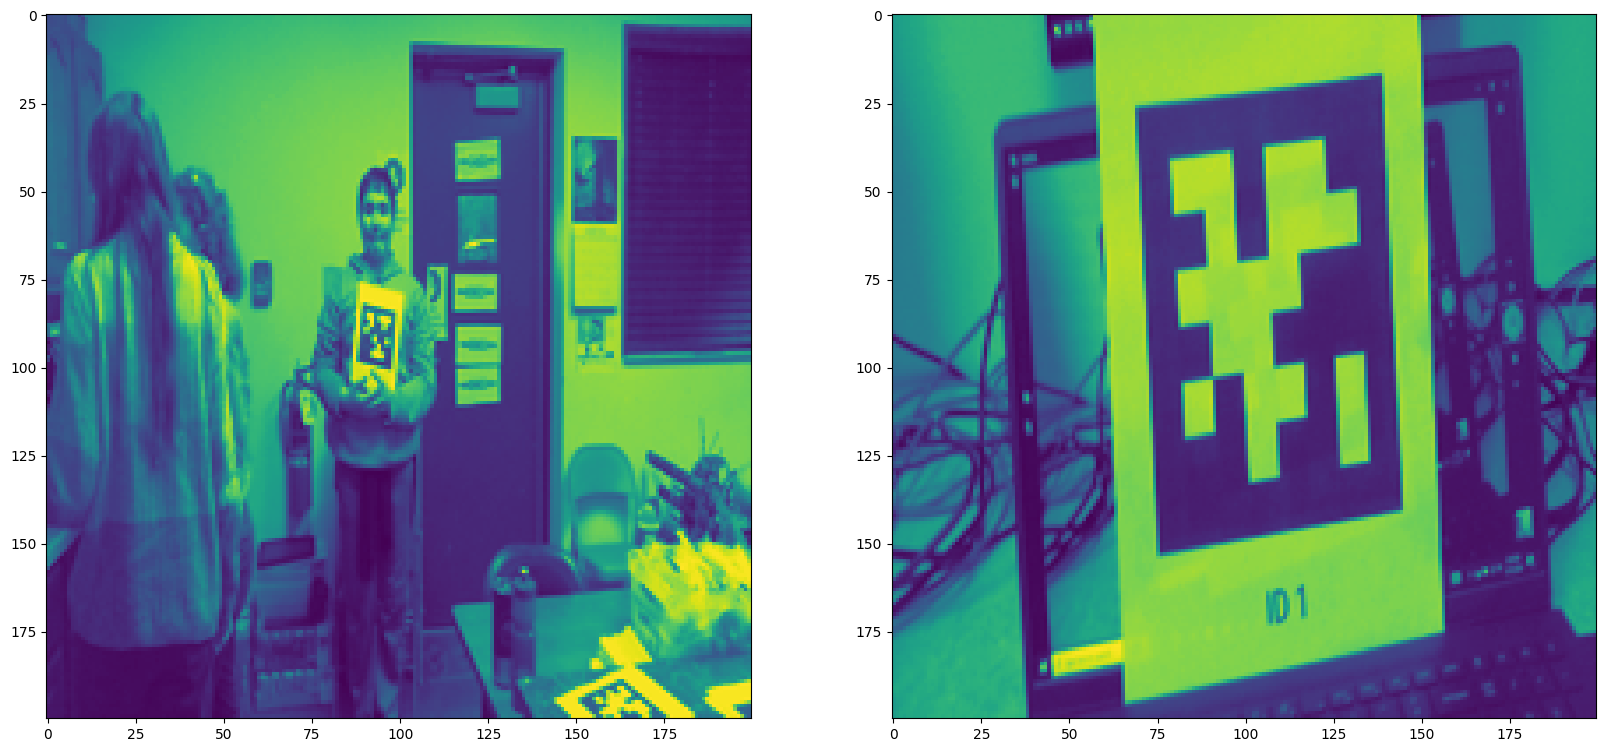

[1, 0.468785, 0.463107, 0.061315, 0.153398]
[0, 0.523969, 0.458252, 0.474916, 0.897087]
Folder 3


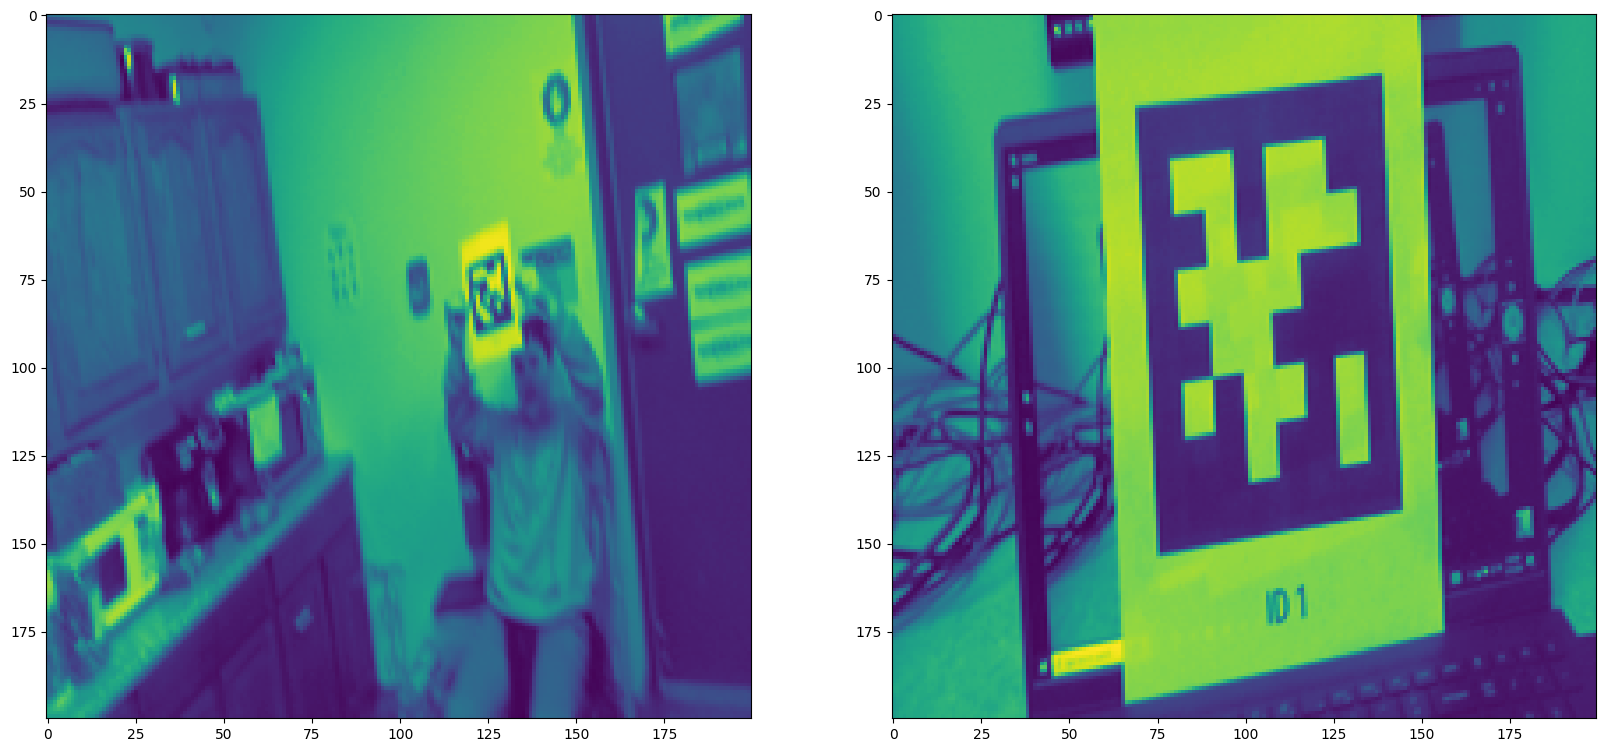

[2, 0.628763, 0.402913, 0.093645, 0.172816]
[0, 0.523969, 0.458252, 0.474916, 0.897087]
Folder 4


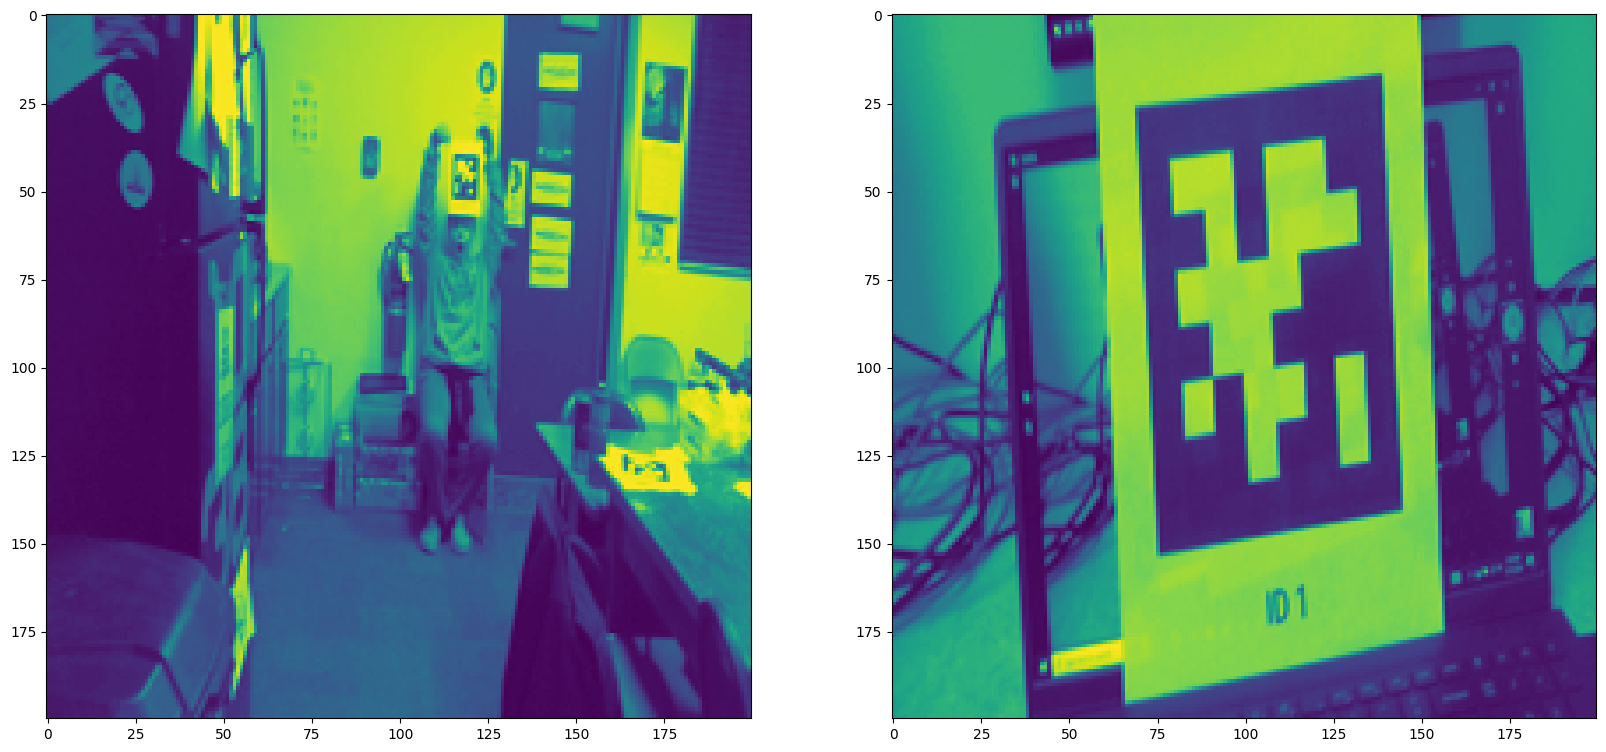

[3, 0.593088, 0.231068, 0.046823, 0.108738]
[0, 0.523969, 0.458252, 0.474916, 0.897087]
Folder 5


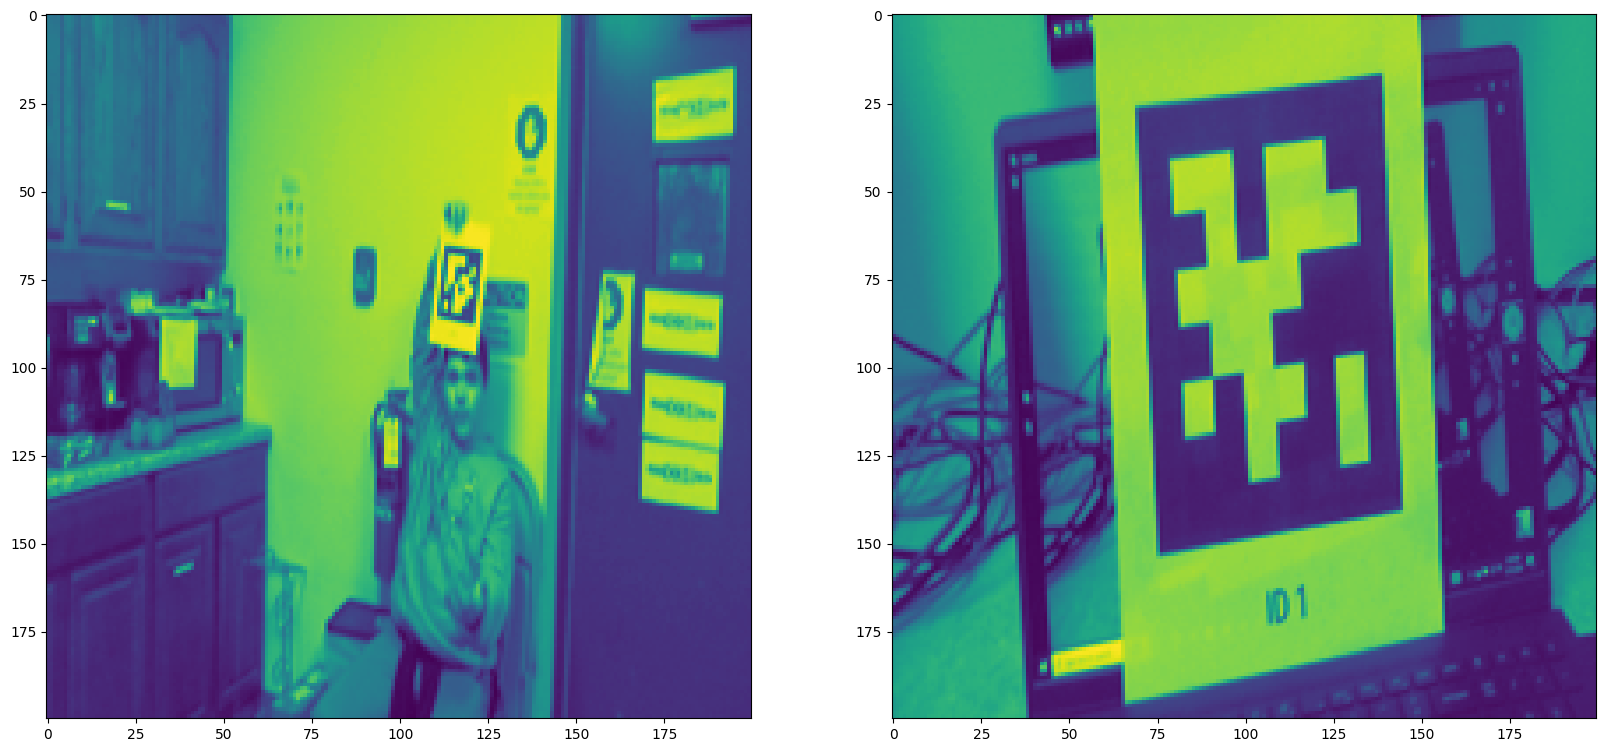

[4, 0.584727, 0.386408, 0.081382, 0.182524]
[0, 0.523969, 0.458252, 0.474916, 0.897087]
Folder 6


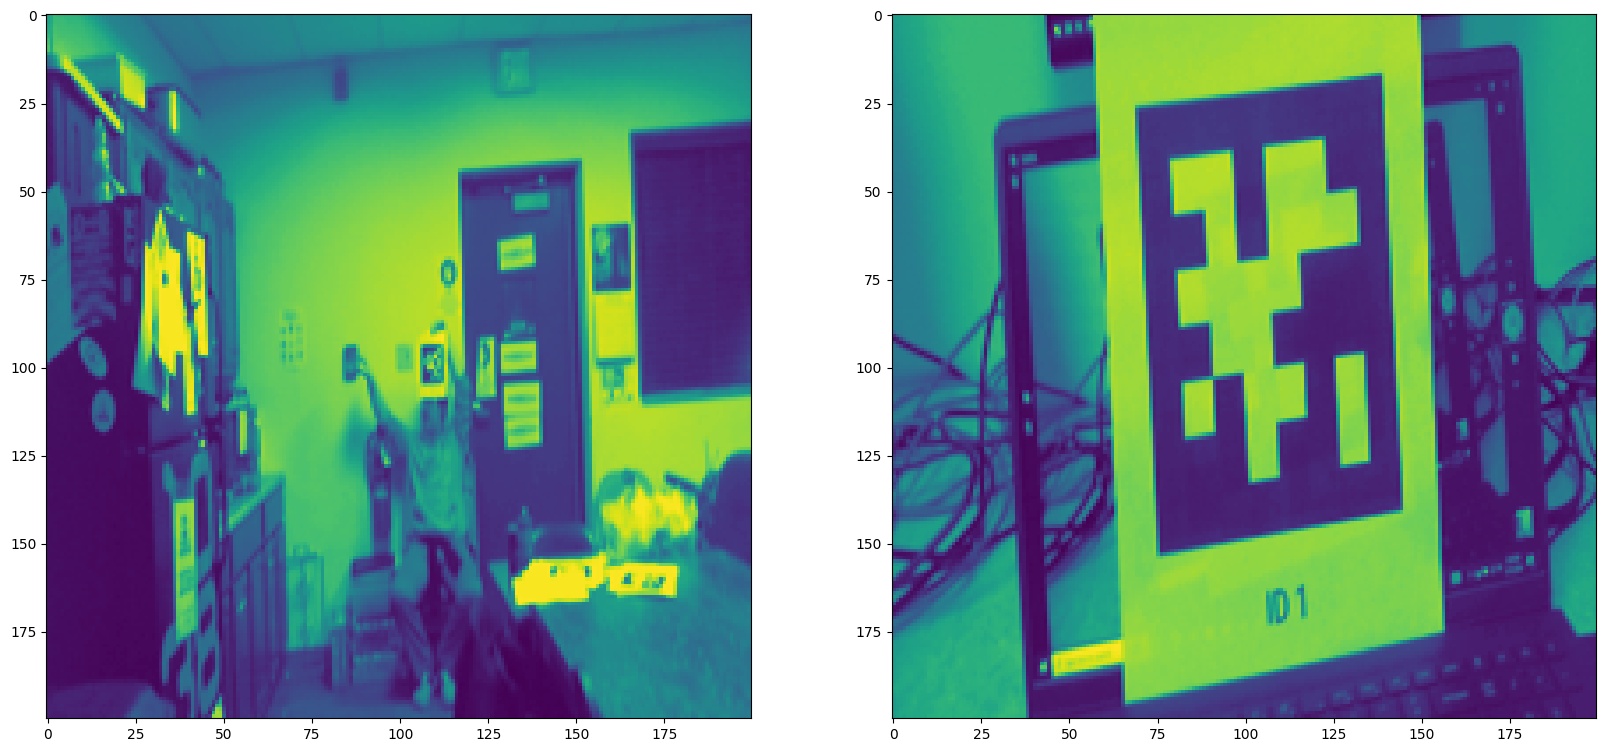

[5, 0.551839, 0.505825, 0.044593, 0.087379]
[0, 0.523969, 0.458252, 0.474916, 0.897087]
Folder 7


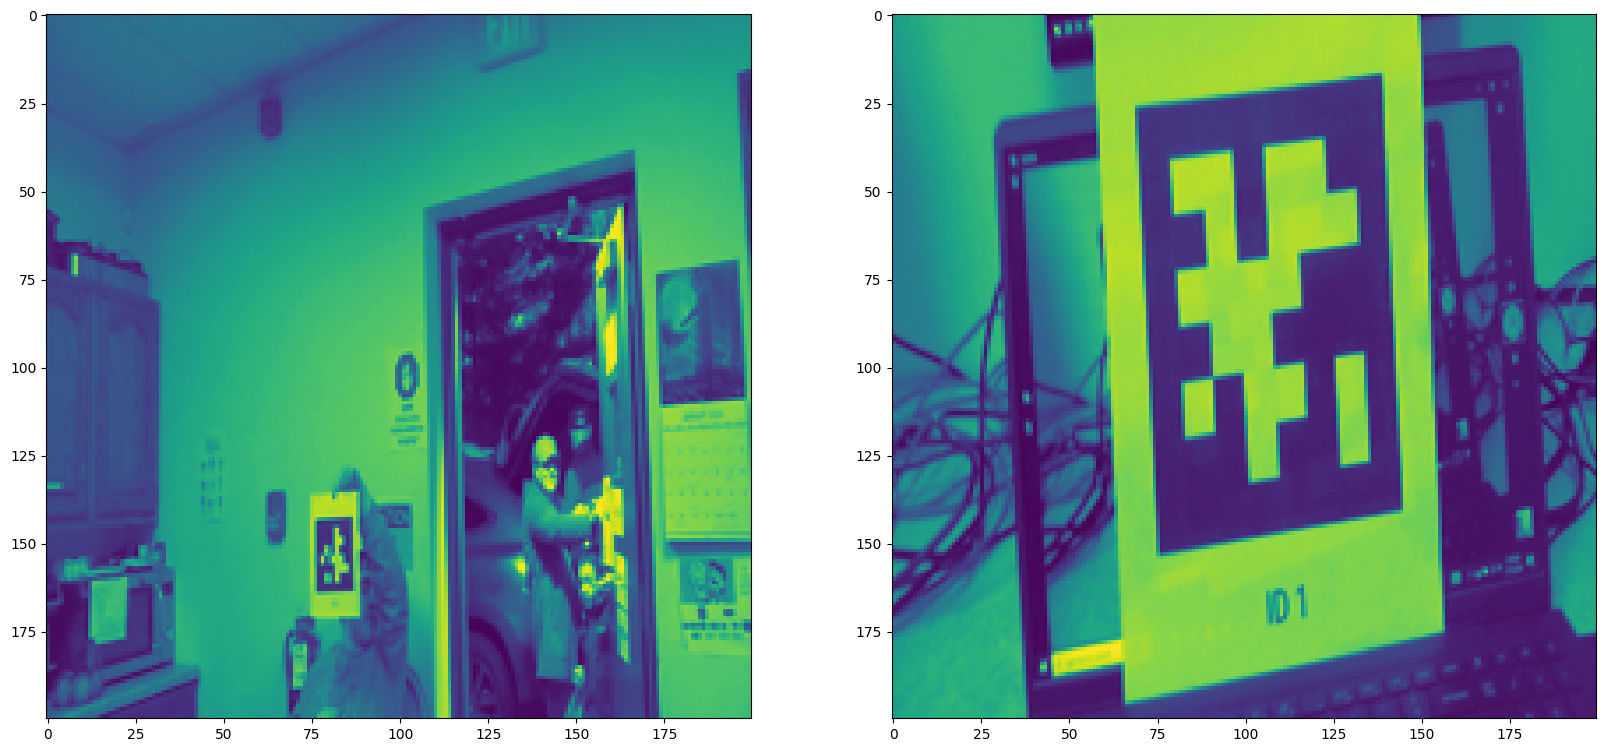

[6, 0.408584, 0.766019, 0.063545, 0.168932]
[0, 0.523969, 0.458252, 0.474916, 0.897087]
Folder 8


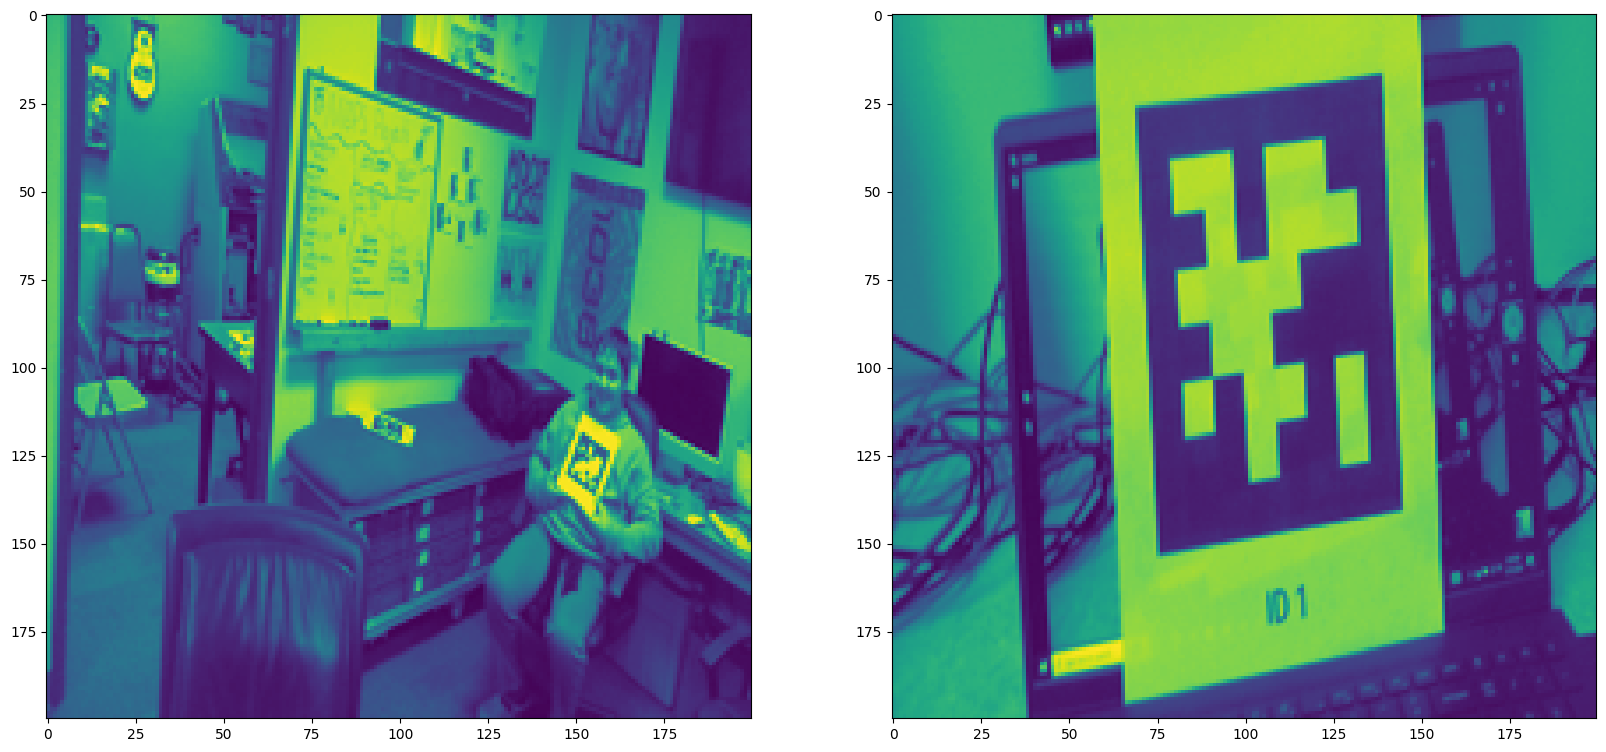

[7, 0.770903, 0.637864, 0.056856, 0.114563]
[0, 0.523969, 0.458252, 0.474916, 0.897087]
Folder 9


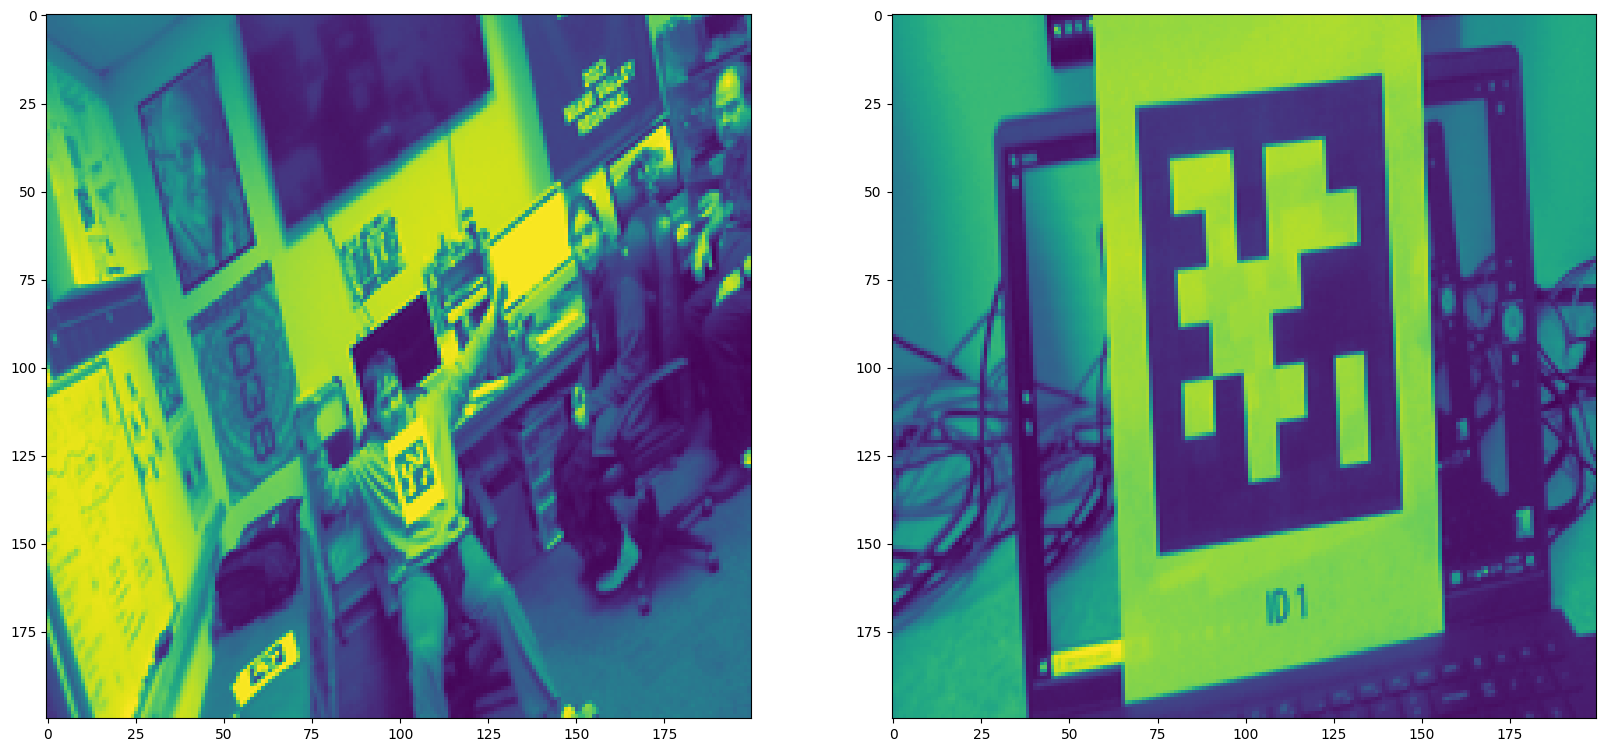

[8, 0.519509, 0.654369, 0.080268, 0.116505]
[0, 0.523969, 0.458252, 0.474916, 0.897087]
Folder not april tags


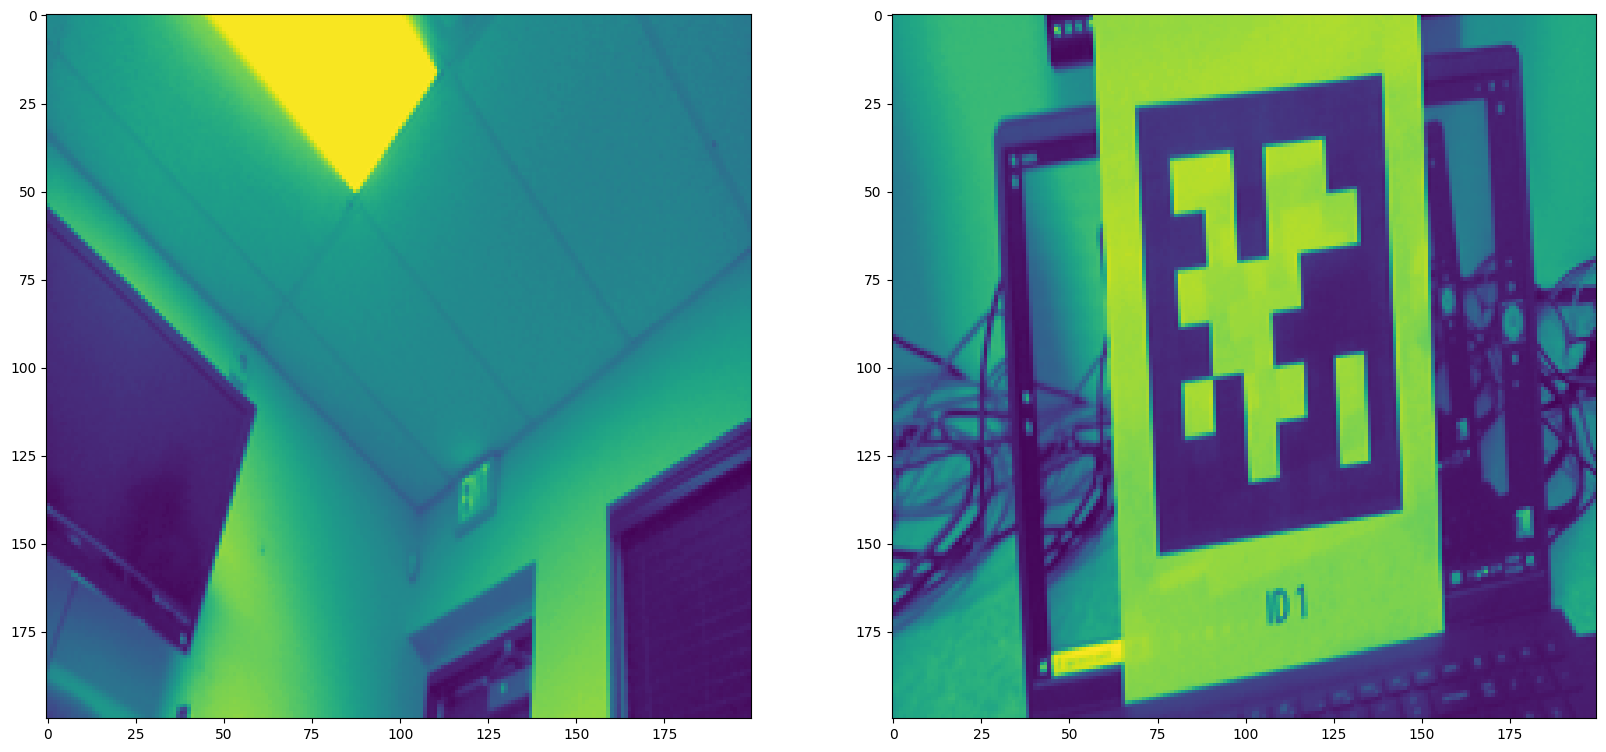

(-1, 0, 0, 0, 0)
[0, 0.523969, 0.458252, 0.474916, 0.897087]
649
40005


Writing


In [1]:
import numpy as np
import pandas as pd
import csv
import os
import glob
from PIL import Image, ImageOps
import matplotlib.pyplot as plt 

SHAPE = (200,200)

def reshape_images(images, new_size):
    new_imgs = []
    new_imgs = [image.resize(new_size) for image in images]
    return new_imgs



def flatten_norm_imgs(images):
    # imgs = reshape_images(images, SHAPE)
    new_imgs = np.array([np.array(img).flatten() for img in images])
    new_imgs = ((new_imgs - np.min(new_imgs))/(np.max(new_imgs)-np.min(new_imgs)))
    #return new images
    return new_imgs

def get_info(filename, dir):
    try:
        data = pd.read_csv(filename[:-3] + "txt", sep=' ', index_col=0, header=None)
    except:
        return (-1, 0,0,0,0)
    for row in data.iterrows():
        aaa = row[0]
        if aaa is int(dir)-1:
              l = row[1].tolist()
              l.insert(0,aaa)
              return l
    return (-1, 0,0,0,0)

pics = []
print("\n\nReading")
PIC_PATH = "./data/"
dirs = os.listdir(PIC_PATH)

# Gather all images from the directory
for dir in dirs:
    print(f"Folder {dir}")
    for filename in glob.glob(f'{PIC_PATH}{dir}/*.jpg'):
        im=Image.open(filename)                     #load image
        pics.append(reshape_images([ImageOps.grayscale(im)], SHAPE))    #store grayscale image
        label = get_info(filename, dir)
        pics[-1].append(label)
    plt.figure(figsize=(20,10))
    plt.subplot(1, 2, 1)
    plt.imshow(pics[-1][0])
    plt.subplot(1, 2, 2)
    plt.imshow(pics[0][0])
    plt.show()
    print(pics[-1][1])
    print(pics[-0][1])

#Turn stuff that is easier to display into stuff that is easier to store
for line in range(len(pics)):
     pics[line] = np.append(flatten_norm_imgs([pics[line][0]]), pics[line][1])

# This code ensures that it was not a jagged array, ie all transformations performed correctly
print(len(pics))
print(len(pics[0]))
for pic in pics:
     if len(pic) != len(pics[0]):
          print("AAAAAAAA")

print("\n\nWriting")
CSV_FILE_NAME = './data/my_file.csv'
with open(CSV_FILE_NAME, 'w') as f:
    writer = csv.writer(f)
    for pic in pics:
            # Each row is one image with it's classification label followed by corner coordinates at the end
            writer.writerow(pic)